# Step 3: Machine Learning Models

根据用户第一次购买的信息，如各类别物品的比例，订单总价来训练模型，预测用户所在的群组。

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, metrics, linear_model, neighbors, tree, ensemble, model_selection
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from lib.models_fitting import *
from lib.plot_results import *
from joblib import dump

In [2]:
train_set = pd.read_csv('./temp/train_set.csv', index_col=0)
X = train_set.loc[:, ['mean', 'Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4']]
Y = train_set.loc[:, ['cluster']]

In [3]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)
display(X_train.head())
display(Y_train.head())
Y_train = Y_train.values.ravel()

,mean,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4
208,713.865,23.301324,17.712733,40.022273,13.129233,5.834436
2180,115.685,33.673337,12.058607,34.559364,16.142974,3.565717
62,3560.225,0.000000,12.611562,22.633401,9.037350,55.717686
3514,275.790,18.833170,33.811958,25.644512,10.515247,11.195112
1177,221.939,5.459158,38.357386,17.566989,17.540856,21.075611


,cluster
208,6
2180,4
62,3
3514,6
1177,6


## 3.1 支持向量机 (SVC) 

In [4]:
n_cluster = 11
Y_pred_list = []

In [5]:
svc = ModelFit(clf = svm.LinearSVC)
svc.grid_train(param_grid = [{'C':np.logspace(-2,2,20)}], k = 5)
svc.grid_fit(X_train, Y_train)

c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: Conver

c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: Conver

c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\svm\_base.py:977: Conver

In [6]:
svc.grid_predict(X_test, Y_test)

正确率: 85.91 %


没有标准化的混淆矩阵


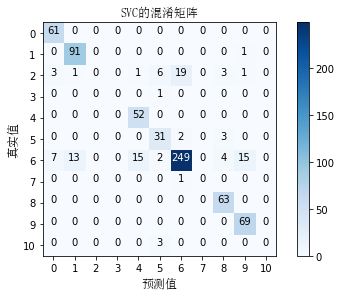

In [7]:
plot_confusion_matrix(Y_test, svc.predictions, n_cluster, model_name = "SVC")
Y_pred_list.append(svc.predictions)

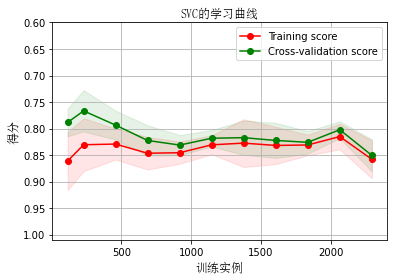

In [8]:
g = plot_learning_curve(svc.grid.best_estimator_, X_train, Y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                       model_name = "SVC")

## 5.2 Logistic Regression

In [9]:
lr = ModelFit(clf = linear_model.LogisticRegression)
lr.grid_train(param_grid = [{'C':np.logspace(-2,2,20)}], k = 5)
lr.grid_fit(X_train, Y_train)

c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\edwin\anaconda3\envs\e-commerce data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

In [10]:
lr.grid_predict(X_test, Y_test)

正确率: 90.93 %


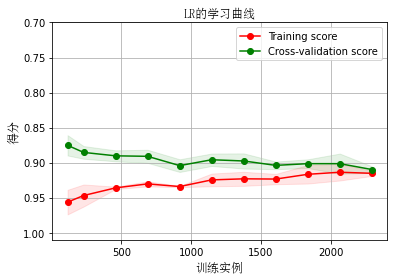

In [11]:
Y_pred_list.append(lr.predictions)
g = plot_learning_curve(lr.grid.best_estimator_, X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                        model_name = "LR")

## 5.3 k-Means Neighbors

In [12]:
knn = ModelFit(clf = neighbors.KNeighborsClassifier)
knn.grid_train(param_grid = [{'n_neighbors': np.arange(1,50,1)}], k = 5)
knn.grid_fit(X_train, Y_train)

In [13]:
knn.grid_predict(X_test, Y_test)

正确率: 78.38 %


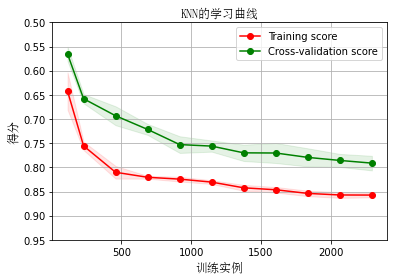

In [14]:
Y_pred_list.append(knn.predictions)
g = plot_learning_curve(knn.grid.best_estimator_, X_train, Y_train,
                        ylim = [0.95, 0.5], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                       model_name = "KNN")

## 5.4 Decision Tree

In [15]:
tr = ModelFit(clf = tree.DecisionTreeClassifier)
tr.grid_train(param_grid = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], k = 5)
tr.grid_fit(X_train, Y_train)

In [16]:
tr.grid_predict(X_test, Y_test)

正确率: 82.85 %


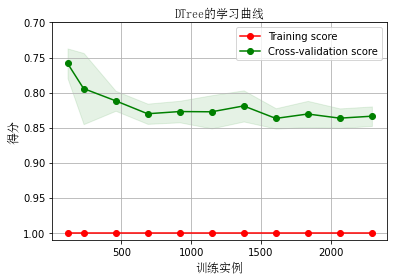

In [17]:
Y_pred_list.append(tr.predictions)
g = plot_learning_curve(tr.grid.best_estimator_, X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                       model_name="DTree")

## 5.5 Random Forest

In [18]:
rf = ModelFit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_train(param_grid = param_grid, k = 5)
rf.grid_fit(X_train, Y_train)

In [19]:
rf.grid_predict(X_test, Y_test)

正确率: 89.96 %


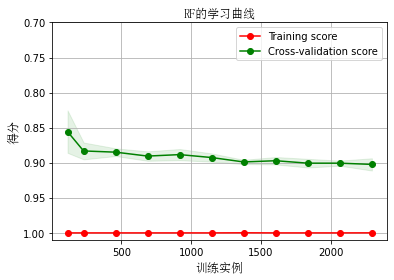

In [20]:
Y_pred_list.append(rf.predictions)
g = plot_learning_curve(rf.grid.best_estimator_, X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                       model_name = "RF")

## 5.6 AdaBoost Classifier

In [21]:
ada = ModelFit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_train(param_grid = param_grid, k = 5)
ada.grid_fit(X_train, Y_train)

In [22]:
ada.grid_predict(X_test, Y_test)

正确率: 57.88 %


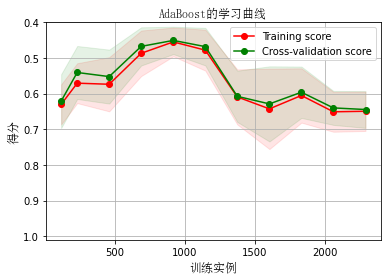

In [23]:
Y_pred_list.append(ada.predictions)
g = plot_learning_curve(ada.grid.best_estimator_, X_train, Y_train,
                        ylim = [1.01, 0.4], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                       model_name="AdaBoost")

## 5.7 Gradient Boosting Classifier

In [24]:
gb = ModelFit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_train(param_grid = param_grid, k = 5)
gb.grid_fit(X_train, Y_train)

In [25]:
gb.grid_predict(X_test, Y_test)

正确率: 89.26 %


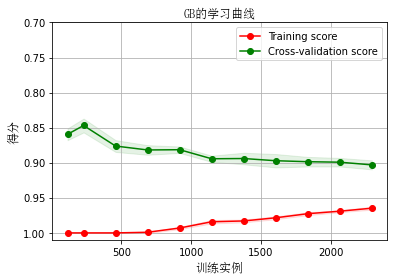

In [26]:
Y_pred_list.append(gb.predictions)
g = plot_learning_curve(gb.grid.best_estimator_, X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                       model_name="GB")

## 5.8 Vote机制

In [27]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

In [28]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best),
                                                ('knn', knn_best)], voting='soft')

In [29]:
votingC = votingC.fit(X_train, Y_train)

In [30]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 90.52 % 


没有标准化的混淆矩阵


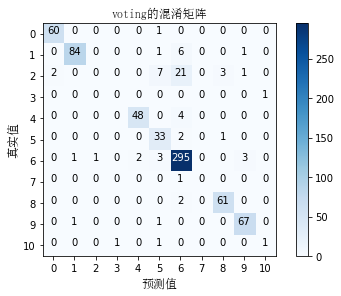

In [31]:
Y_pred_list.append(predictions)
plot_confusion_matrix(Y_test, predictions, n_cluster, model_name="voting")

In [32]:
model_names = ["SVC", "LR", "KNN", "DTree", "RF", "AdaBoost", "GB", "Voting"]

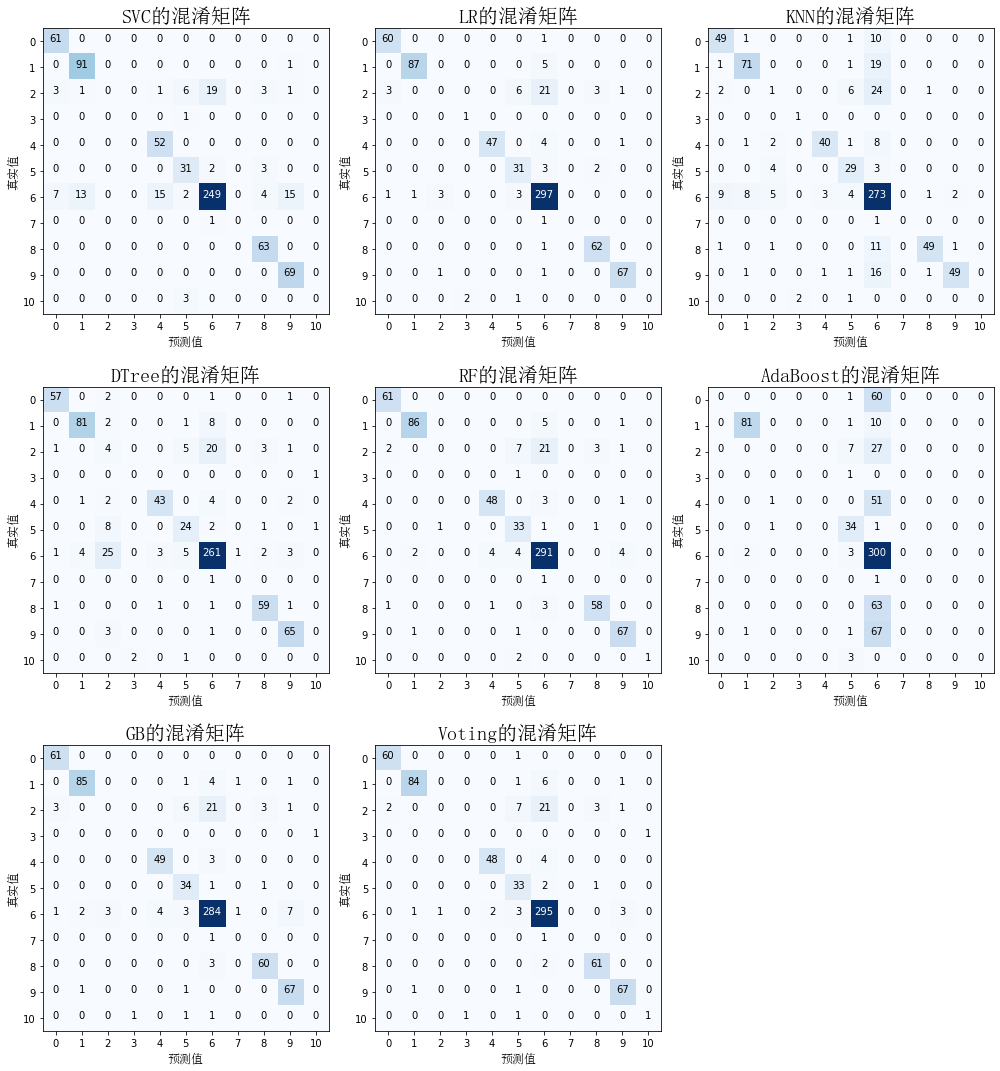

In [33]:
summary_confusion_matrices(Y_test, Y_pred_list, n_cluster, model_names)

In [34]:
# 保存最终模型
if not os.path.exists('./temp/votingC_model.joblib'):
    dump(votingC, './temp/votingC_model.joblib') 